## K-Fold Results

In this notebook the results of $R^{2}$ for each fold are presented. $Q^{2}$ is calculated for the saved predictions of each fold over the validation set.

## Used libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os

## Load the KFold Results

In [2]:
data = []
for i in range(10): 
    data.append( np.load('./kfolds/{}.npy'.format(i))[0] )

In [3]:
data = np.array(data)
data

array([[ 0.53868008,  8.91599274,  0.68628329],
       [ 0.54251337,  8.92971516,  0.66681898],
       [ 0.62253594, 10.45348454,  0.58846927],
       [ 0.63086581, 10.34778309,  0.55730188],
       [ 0.59308141, 10.04655457,  0.60735476],
       [ 0.60493559, 10.23077297,  0.60226226],
       [ 0.61040771, 10.14047241,  0.58921009],
       [ 0.65908957, 11.0468092 ,  0.51747656],
       [ 0.59880203,  9.87094784,  0.64499712],
       [ 0.70316446, 11.7056551 ,  0.48151857]])

In [4]:
data.shape

(10, 3)

In [5]:
k = 1
for i in data:
    print('Fold: {} -> MAE: {:.3f} - MAPE: {:.2f} - R2: {:.2f}'.format(k, i[0], i[1], i[2]) )
    k+=1

Fold: 1 -> MAE: 0.539 - MAPE: 8.92 - R2: 0.69
Fold: 2 -> MAE: 0.543 - MAPE: 8.93 - R2: 0.67
Fold: 3 -> MAE: 0.623 - MAPE: 10.45 - R2: 0.59
Fold: 4 -> MAE: 0.631 - MAPE: 10.35 - R2: 0.56
Fold: 5 -> MAE: 0.593 - MAPE: 10.05 - R2: 0.61
Fold: 6 -> MAE: 0.605 - MAPE: 10.23 - R2: 0.60
Fold: 7 -> MAE: 0.610 - MAPE: 10.14 - R2: 0.59
Fold: 8 -> MAE: 0.659 - MAPE: 11.05 - R2: 0.52
Fold: 9 -> MAE: 0.599 - MAPE: 9.87 - R2: 0.64
Fold: 10 -> MAE: 0.703 - MAPE: 11.71 - R2: 0.48


In [6]:
k = 1
for i in data:
    print('{:.2f},'.format(i[2]) )
    k+=1

0.69,
0.67,
0.59,
0.56,
0.61,
0.60,
0.59,
0.52,
0.64,
0.48,


## Plots

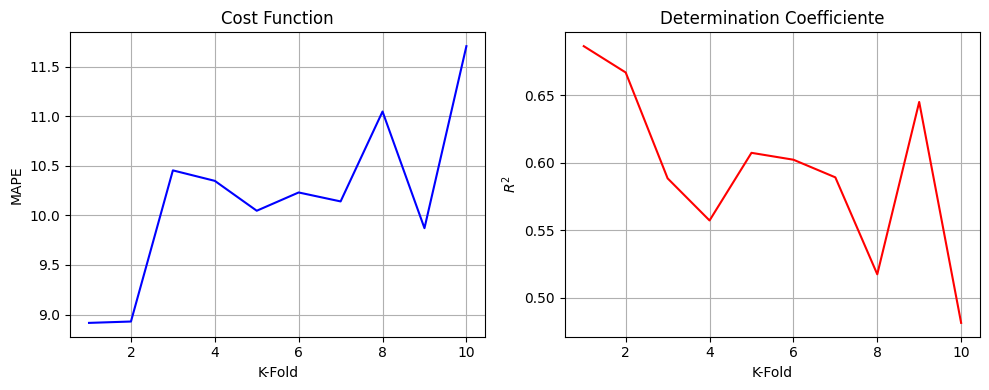

In [7]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
x = [x for x in range(1, 11)]

# First plot
ax1.plot(x, data[:, -2], color='blue')
ax1.set_title('Cost Function')
ax1.set_xlabel('K-Fold')
ax1.set_ylabel('MAPE')
ax1.grid()

# Second plot
ax2.plot(x, data[:, -1], color='red')
ax2.set_title('Determination Coefficiente')
ax2.set_xlabel('K-Fold')
ax2.set_ylabel(r'$R^{2}$')
ax2.grid()

plt.tight_layout()
plt.show()


In [8]:
print( 'MAPE: {:.2f} STD: {:.2f} - HB: {:.2f}'.format(
    np.mean(data[:, -2]), 
    np.std(data[:, -2]), 
    (np.mean(data[:, -2]) + np.std(data[:, -2])) 
     ) )

MAPE: 10.17 STD: 0.80 - HB: 10.97


In [9]:
print( 'R2: {:.2f} STD: {:.2f} - LB: {:.2f}'.format(
    np.mean(data[:, -1]), 
    np.std(data[:, -1]), 
    (np.mean(data[:, -1]) - np.std(data[:, -1])) 
))

R2: 0.59 STD: 0.06 - LB: 0.53


## Q2

In [10]:
np.load('./preds/preds_9.npy').shape

(2, 315)

In [11]:
#ind_x_data = np.array([ int(path[2]) for path in os.listdir('./preds/') if 'x' in path]) # np.load('./preds/'+path)
#x_data = np.array([ np.load('./preds/'+path) for path in os.listdir('./preds/') if 'x' in path])[ ind_x_data.argsort()]
x_data = [ np.load('./preds/'+path)[0, :] for path in os.listdir('./preds') ]
x_data = np.concatenate(x_data)
x_data.shape

(3152,)

In [12]:
#ind_y_data = np.array([ int(path[6]) for path in os.listdir('./preds/') if 'preds' in path]) # np.load('./preds/'+path)
#ind_y_data
#y_data = np.array([ np.load('./preds/'+path) for path in os.listdir('./preds/') if 'preds' in path])[ ind_y_data.argsort()]
#y_data.shape
y_data = [ np.load('./preds/'+path)[1, :] for path in os.listdir('./preds') ]
y_data = np.concatenate(y_data)
y_data.shape

(3152,)

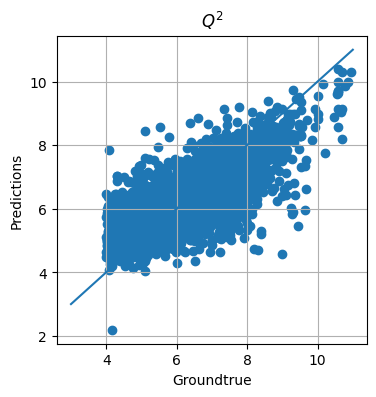

In [13]:
plt.figure(figsize = (4,4))
plt.plot(
    [x for x in range(3,12)],
    [x for x in range(3,12)]
)

plt.scatter(
    x_data,
    y_data
)
plt.xlabel('Groundtrue')
plt.ylabel('Predictions')
plt.title(r'$Q^{2}$')
plt.grid()
plt.show()

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2 = r2_score(x_data, y_data )
r2

0.5940540369088905